<a href="https://colab.research.google.com/github/maryamagahi/Playground/blob/main/ML_Classification_Potential_Customers_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Classification - Potential Customer Prediction
* [Context](#1)
* [Import Libraries and Data](#2)
* [Load Data](#3)
* [Data Overview](#4)
* [Exploratory Data Analysis(EDA)](#5)
* [Data Preprocessing](#6)
* [Decision Tree Model](#7)
* [Random Forest Model](#8)
* [Actionable Insights and Recommendations](#9)


<a name="1"></a>
## 1. Context

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly.

### Objective
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert

### Data Dictionary
* **ID:** ID of the lead
* **age:** Age of the lead
* **current_occupation:** Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* **first_interaction:** How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* **profile_completed:** What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* **website_visits:** How many times has a lead visited the website
* **time_spent_on_website:** Total time spent on the website
* **page_views_per_visit:** Average number of pages on the website viewed during the visits.
* **last_activity:** Last interaction between the lead and ExtraaLearn.
    * **Email Activity:** Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * **Phone Activity:** Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * **Website Activity:** Interacted on live chat with representative, Updated profile on website, etc

* **print_media_type1:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* **print_media_type2:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* **digital_media:** Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* **educational_channels:** Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* **referral:** Flag indicating whether the lead had heard about ExtraaLearn through reference.
* **status:** Flag indicating whether the lead was converted to a paid customer or not.

<a name="2"></a>
## 2. Import Libraries and Data

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get various metric scores
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, recall_score, roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

<a name="3"></a>
## 3. Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
learn = pd.read_csv("/content/drive/MyDrive/Data Science/Notebooks/Raw Data/ExtraaLearn.csv")

In [5]:
# Copying data to another variable to avoid any changes to the original data
data = learn.copy()

<a name="4"></a>
## 4. Data Overview


In [7]:
print('Data Shape:',data.shape) # Understand the shape of the dataset
print()
print('First 5 Rows:')
print()
data.head() # View the first five rows

Data Shape: (4612, 15)

First 5 Rows:



,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# Check the data types of each coloumn
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
# Double check if any null values
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [ ]:
# Check if any duplication of data
data.duplicated().sum()

0

In [ ]:
# Check number of unique values by column
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

<a name="5"></a>
## 5. Exploratory Data Analysis (EDA)




In [ ]:
# Review statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


### Categorical Variables Summary


In [ ]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing the count of each unique value
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64
--------------------------------------------------
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------

### Univariate Analysis


In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

**Age**

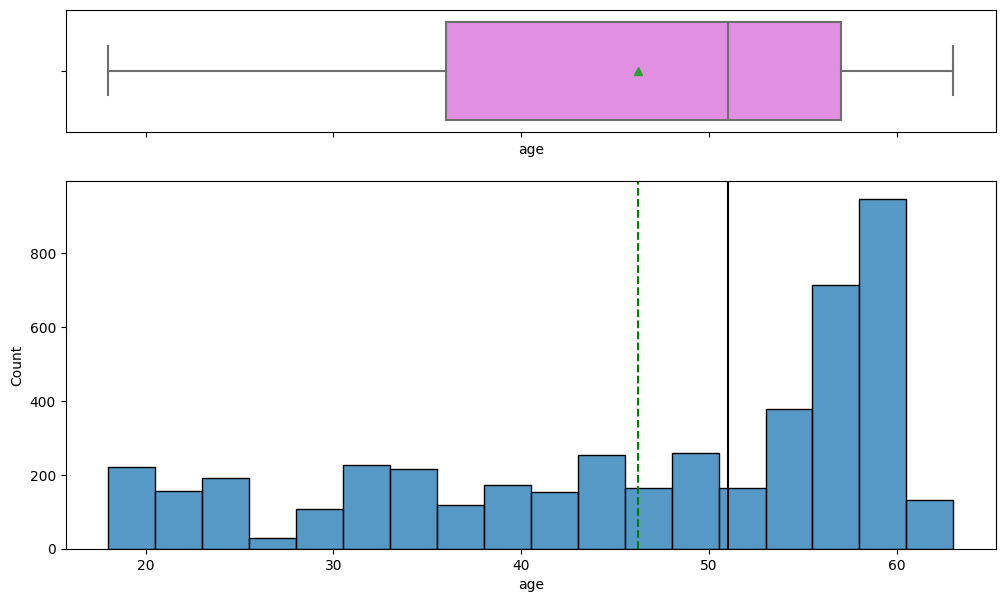

In [ ]:
histogram_boxplot(data, "age")

**Website Visits**

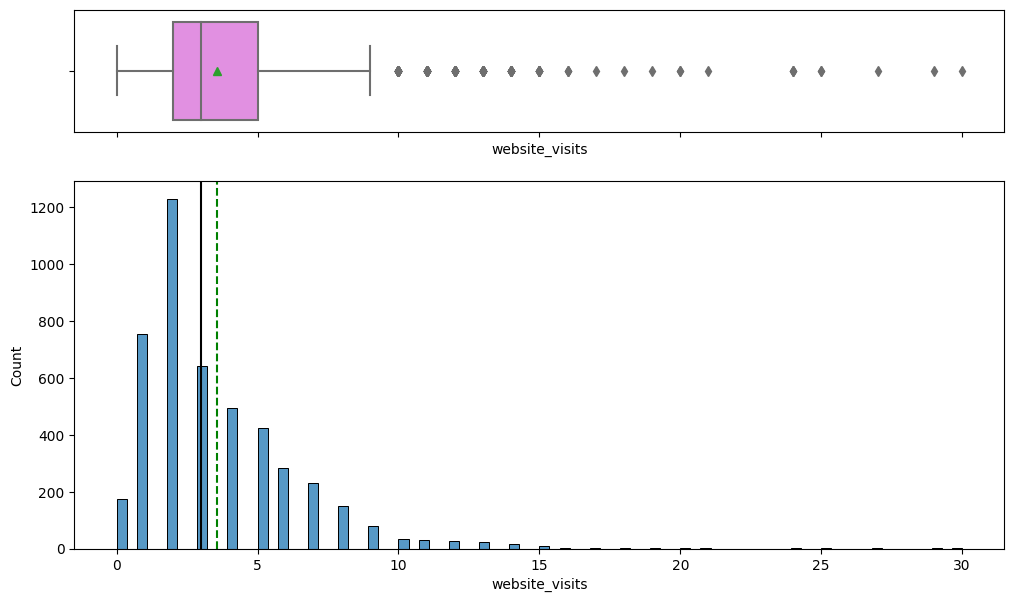

In [ ]:
histogram_boxplot(data, "website_visits")

**Time Spent on Website**

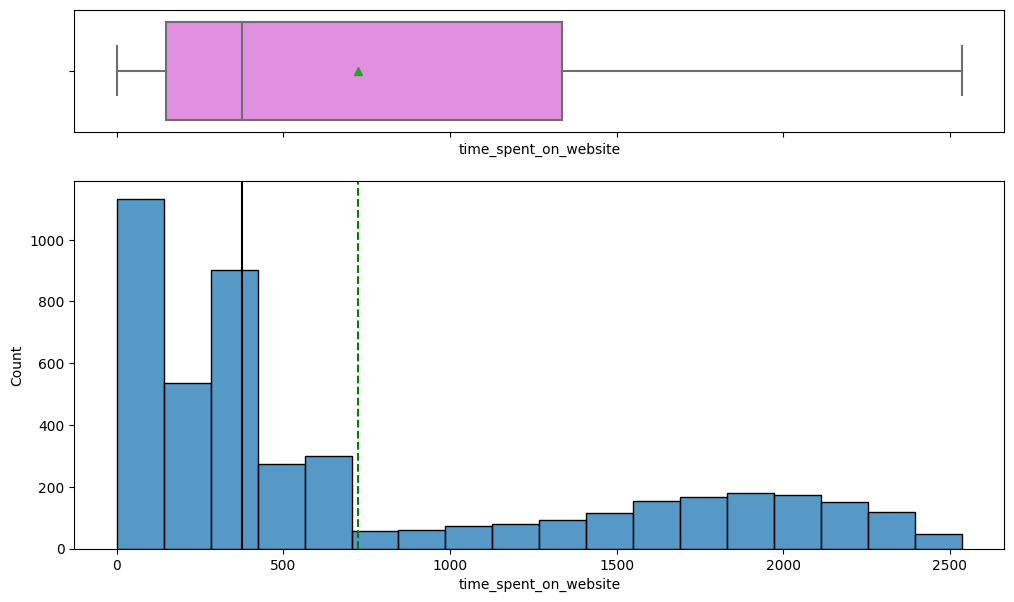

In [ ]:
histogram_boxplot(data, "time_spent_on_website")

**Page Views per Visit**

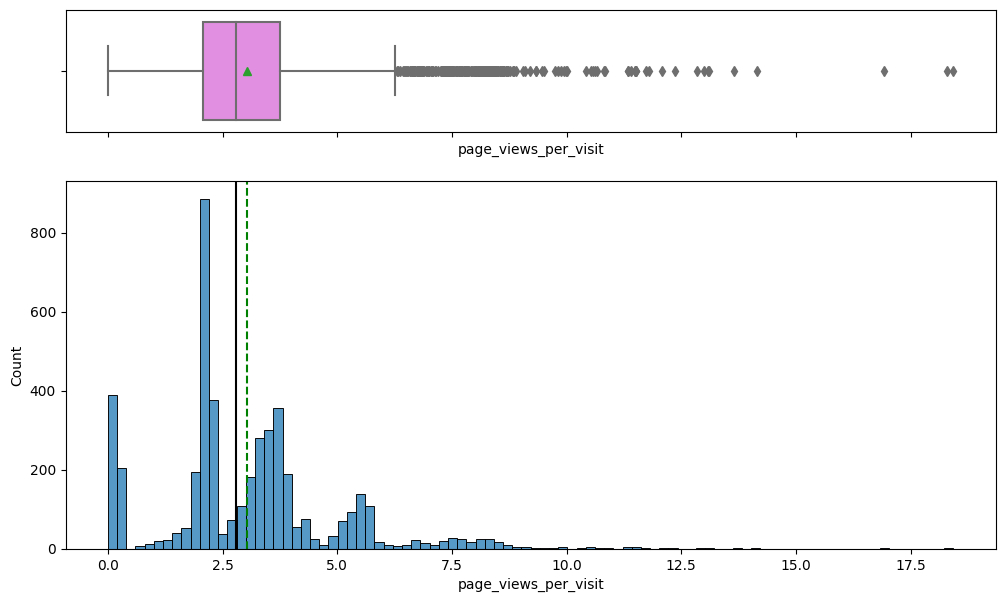

In [ ]:
histogram_boxplot(data, "page_views_per_visit")

**Status**

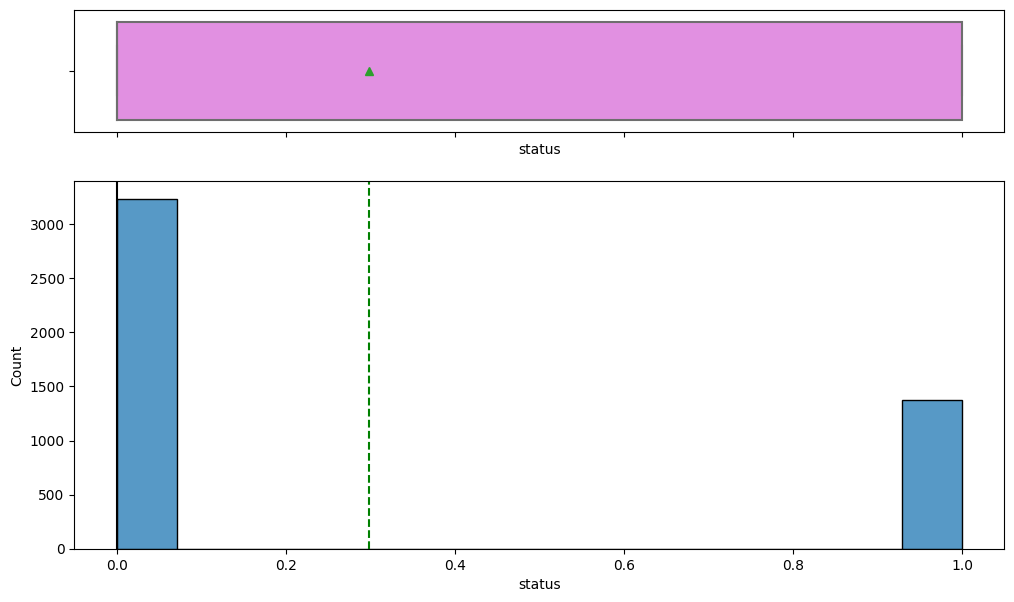

In [ ]:
histogram_boxplot(data, "status")

In [ ]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    plt.show()                            # Show the plot

**Occupation**

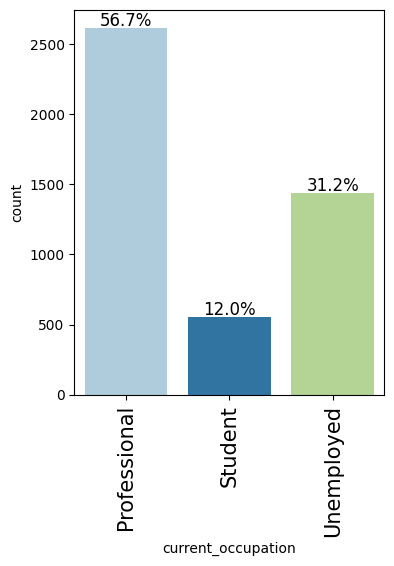

In [ ]:
labeled_barplot(data, "current_occupation", perc = True)

**First Interaction**

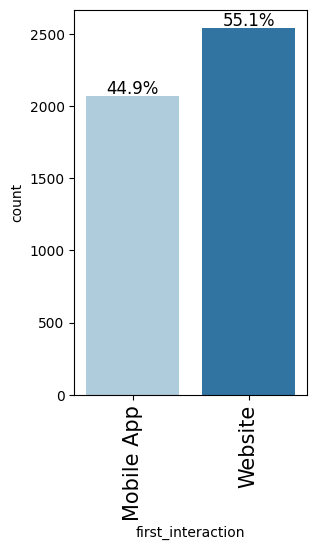

In [ ]:
labeled_barplot(data, "first_interaction", perc = True)

**Profile Completed**

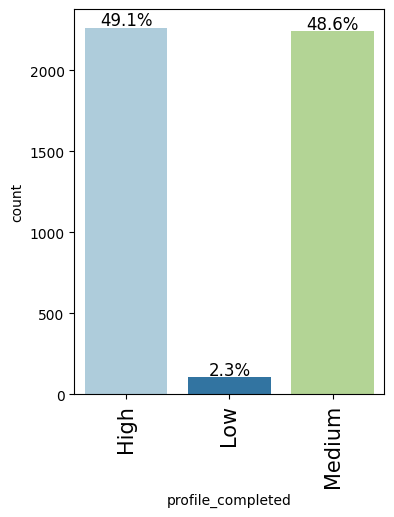

In [ ]:
labeled_barplot(data, "profile_completed", perc = True)

**Last Activity**

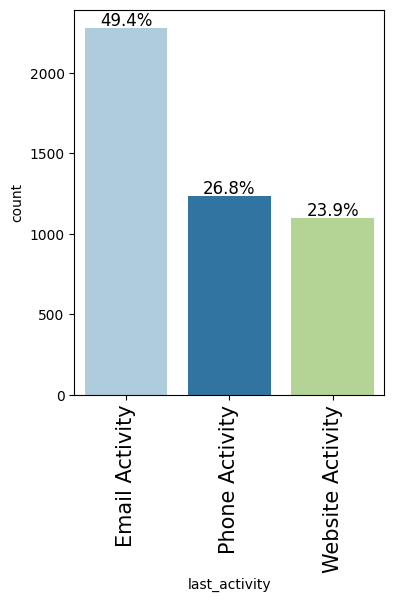

In [ ]:
labeled_barplot(data, "last_activity", perc = True)

**Print Media Type1**

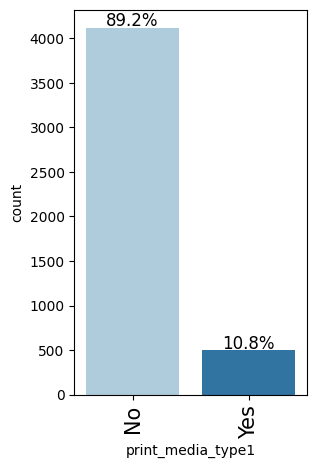

In [ ]:
labeled_barplot(data, "print_media_type1", perc = True)

**Print Media Type2**

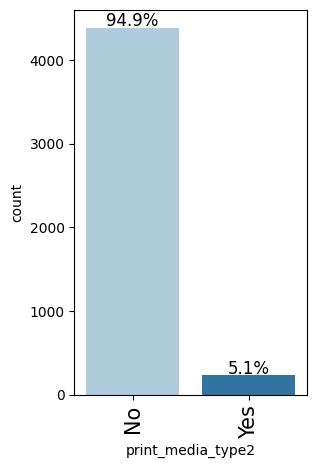

In [ ]:
labeled_barplot(data, "print_media_type2", perc = True)

**Digitial Media**

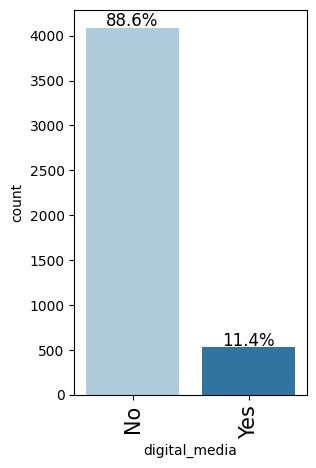

In [ ]:
labeled_barplot(data, "digital_media", perc = True)

**Educational Channels**

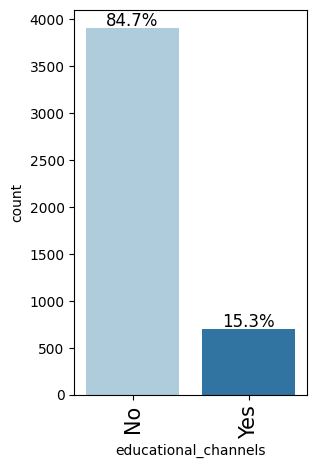

In [ ]:
labeled_barplot(data, "educational_channels", perc = True)

**Referral**

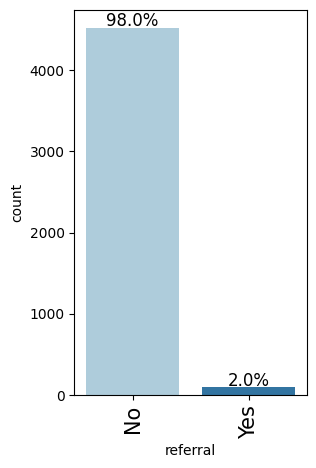

In [ ]:
labeled_barplot(data, "referral", perc = True)

### Bivariate Analysis


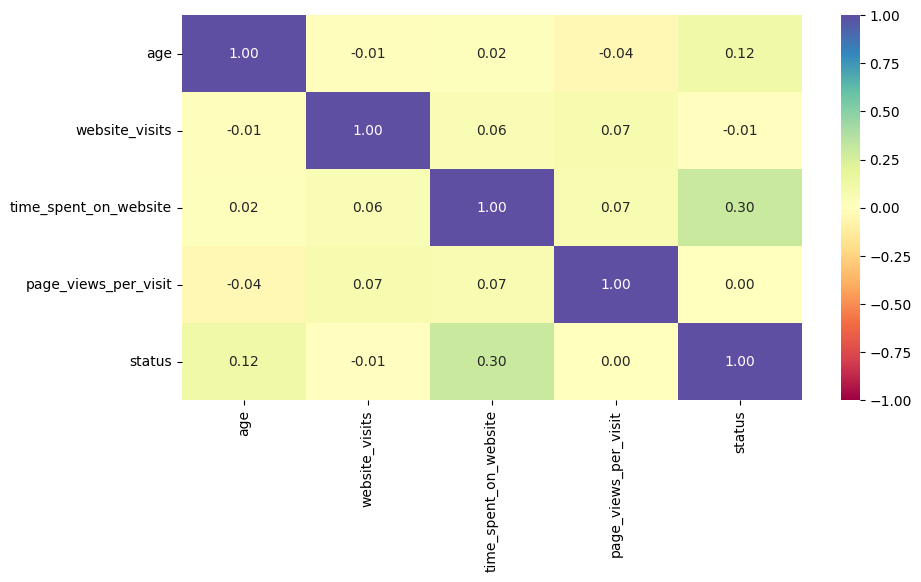

In [ ]:
# Check for relationship between target variable(status) and continous variables(age, website visit, time spent on website,)
cols_list = data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (10, 5))
sns.heatmap(
    data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)
plt.show()

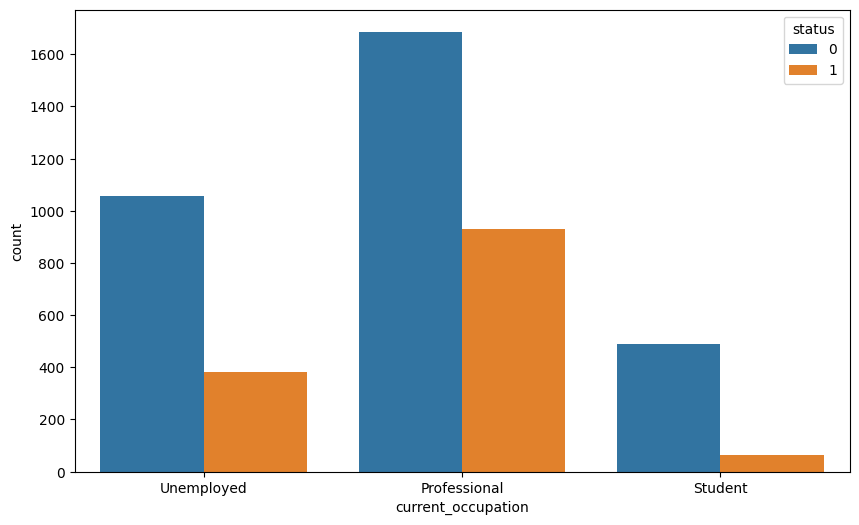

In [ ]:
# Check for relationship between target variable(status) and categorical variable(current occupation)
plt.figure(figsize = (10, 6))

sns.countplot(x = 'current_occupation', hue = 'status', data = data)

plt.show()

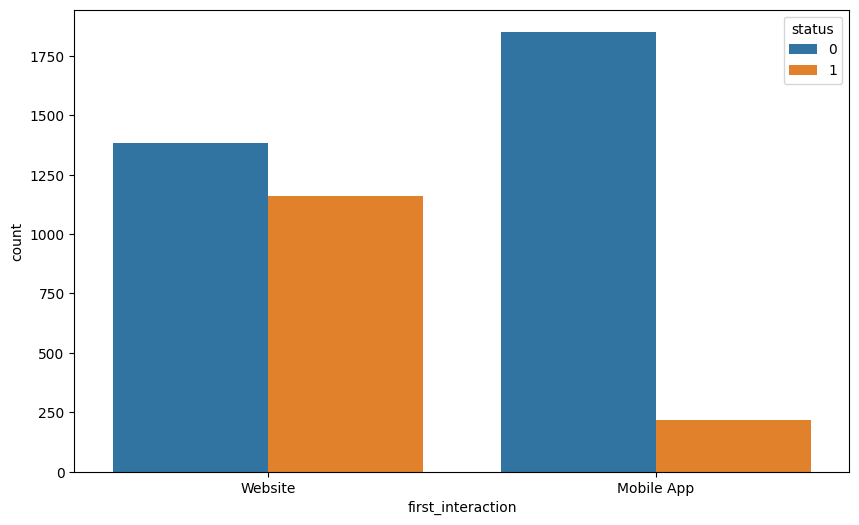

In [ ]:
# Check for relationship between target variable(status) and categorical variable(first_interaction)
plt.figure(figsize = (10, 6))

sns.countplot(x = 'first_interaction', hue = 'status', data = data)

plt.show()

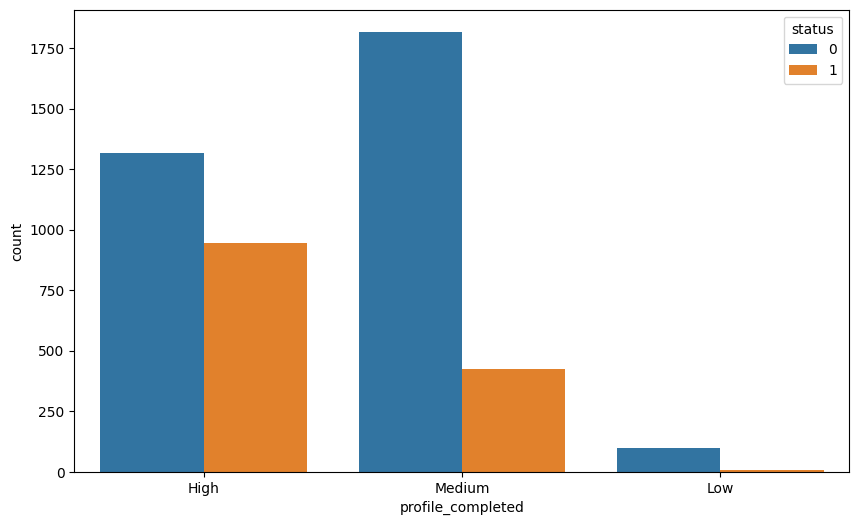

In [ ]:
# Check for relationship between target variable(status) and categorical variable(profile_completed)
plt.figure(figsize = (10, 6))

sns.countplot(x = 'profile_completed', hue = 'status', data = data)

plt.show()

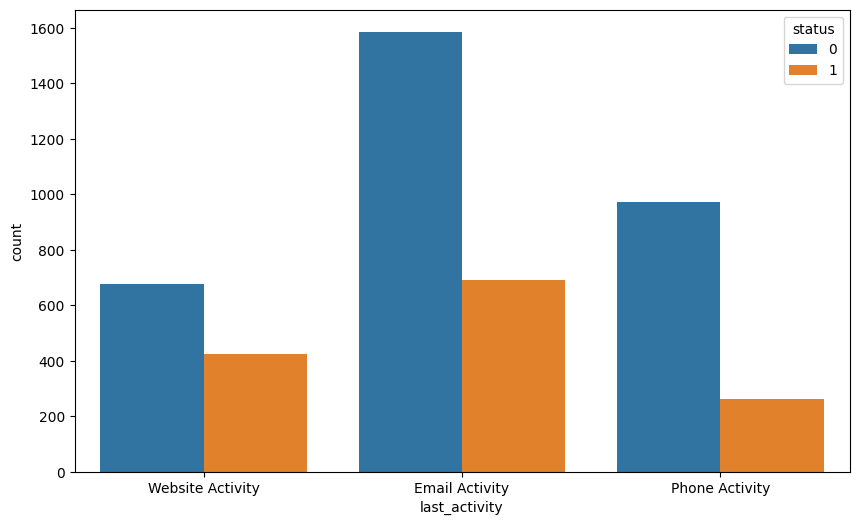

In [ ]:
# Check for relationship between target variable(status) and categorical variable(last activity)
plt.figure(figsize = (10, 6))

sns.countplot(x = 'last_activity', hue = 'status', data = data)

plt.show()

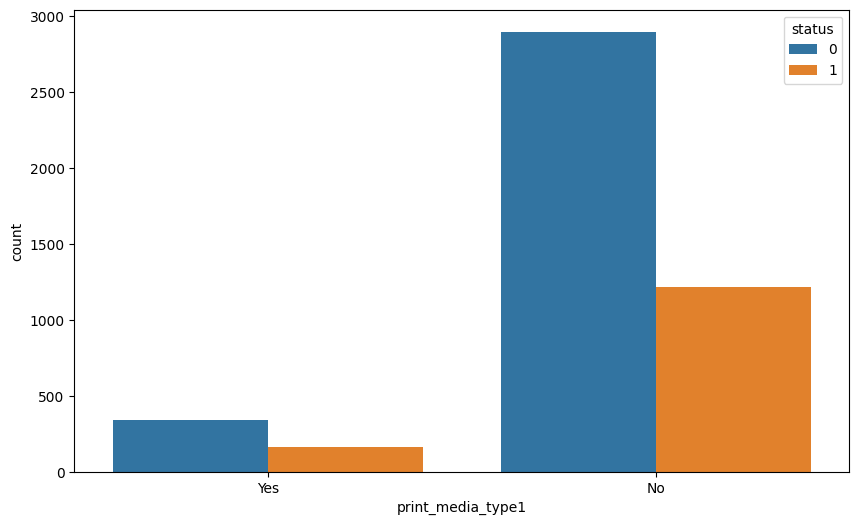

In [ ]:
# Check for relationship between target variable(status) and categorical variable(print media type1)
plt.figure(figsize = (10, 6))

sns.countplot(x = 'print_media_type1', hue = 'status', data = data)

plt.show()

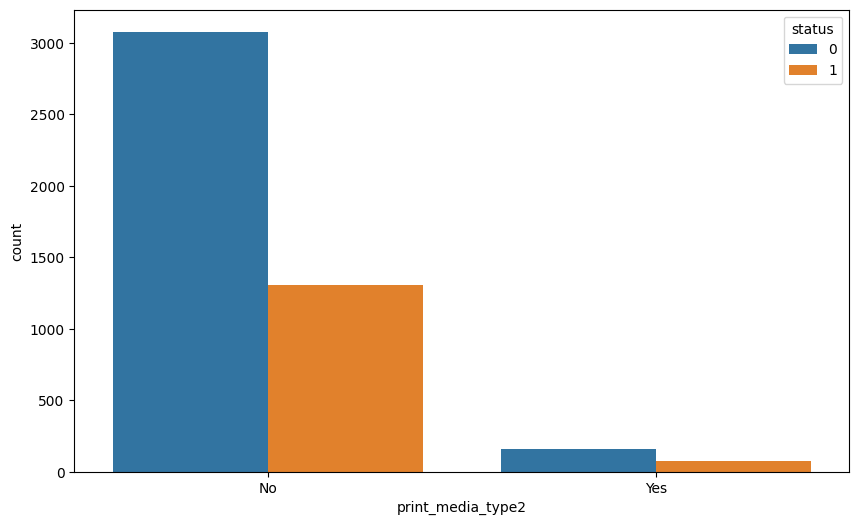

In [ ]:
# Check for relationship between target variable(status) and categorical variable(print media type2)
plt.figure(figsize = (10, 6))

sns.countplot(x = 'print_media_type2', hue = 'status', data = data)

plt.show()

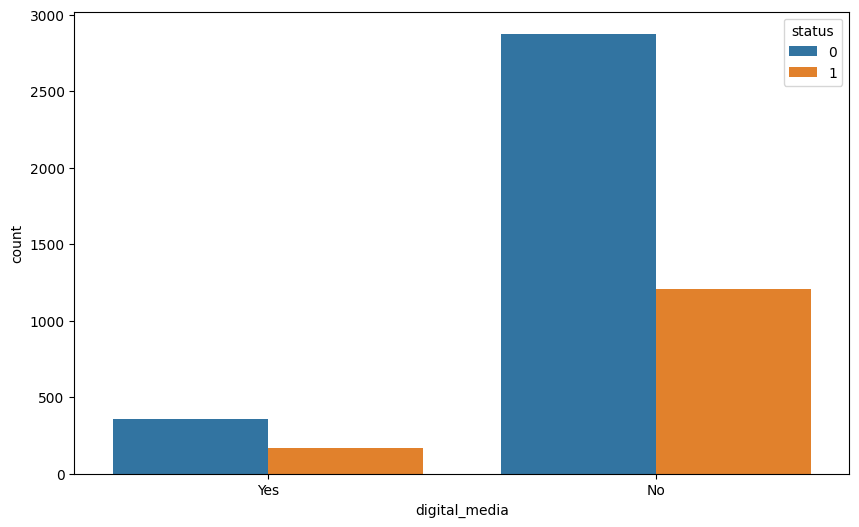

In [ ]:
# Check for relationship between target variable(status) and categorical variable(digital media)
plt.figure(figsize = (10, 6))

sns.countplot(x = 'digital_media', hue = 'status', data = data)

plt.show()

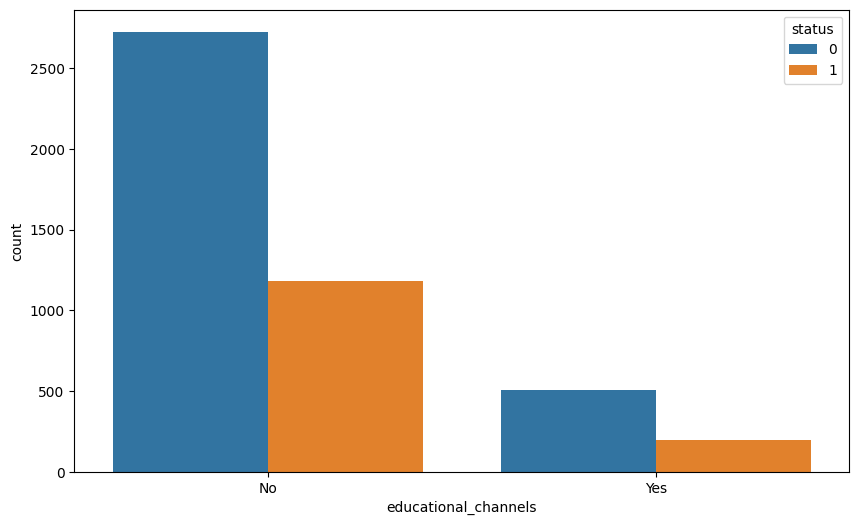

In [ ]:
# Check for relationship between target variable(status) and categorical variable(educational channels)
plt.figure(figsize = (10, 6))

sns.countplot(x = 'educational_channels', hue = 'status', data = data)

plt.show()

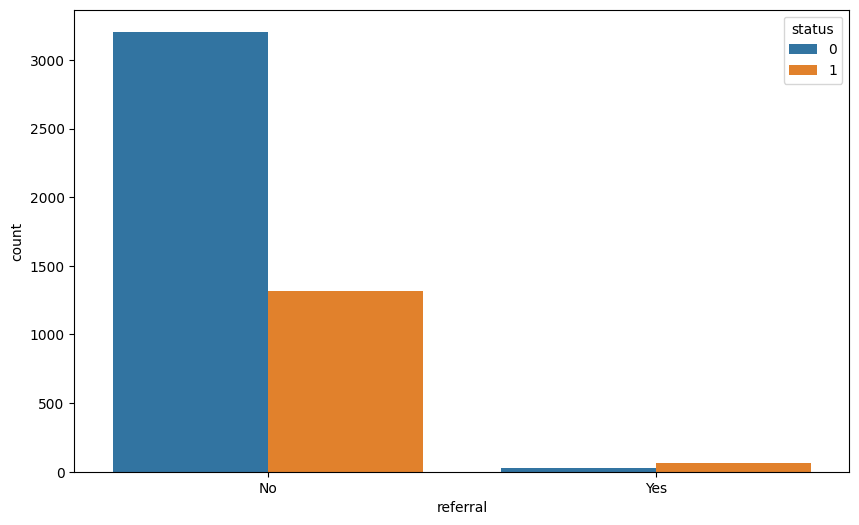

In [ ]:
# Check for relationship between target variable(status) and categorical variable(referral)
plt.figure(figsize = (10, 6))

sns.countplot(x = 'referral', hue = 'status', data = data)

plt.show()

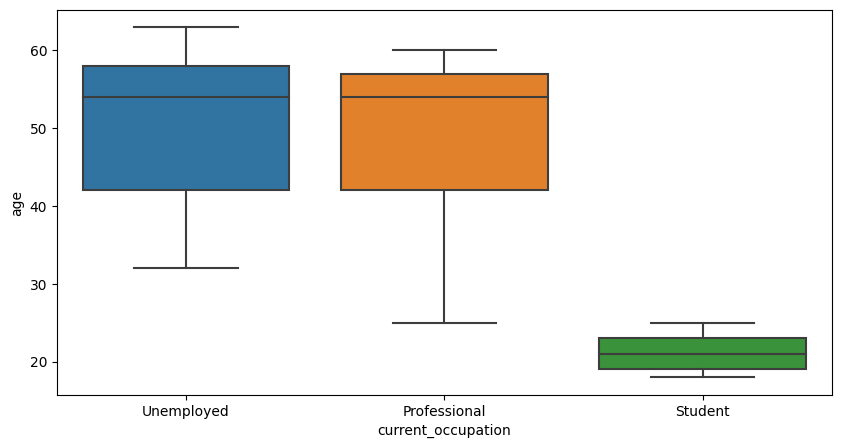

In [ ]:
# Check for relationship between independent variable(age) and categorical variable(current occupation)
plt.figure(figsize = (10, 5))

sns.boxplot(x = data["current_occupation"], y = data["age"])

plt.show()

In [ ]:
# Calculate summary statiscs for age by current occupation
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


<a name="6"></a>
## 6. Data Preprocessing



In [ ]:
# Dropping ID column
data.drop(["ID"], axis = 1, inplace = True)

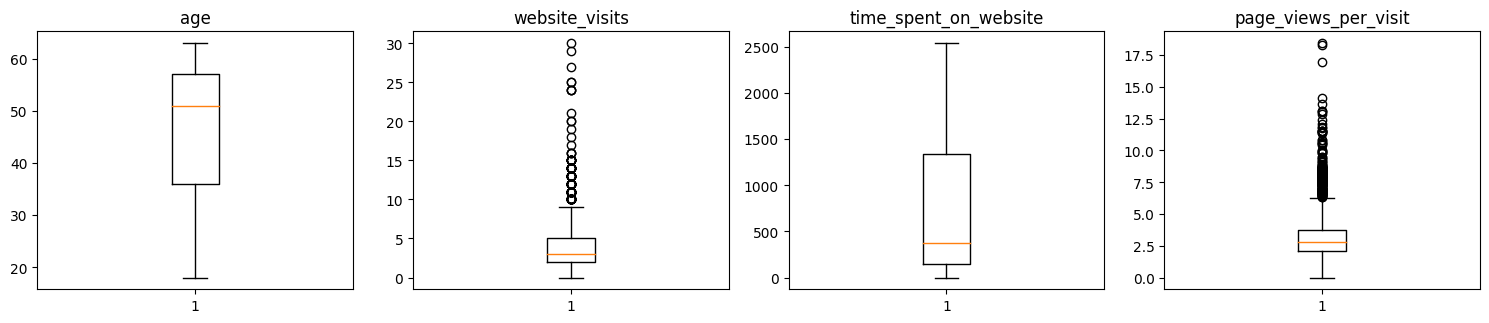

In [12]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("status")


plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

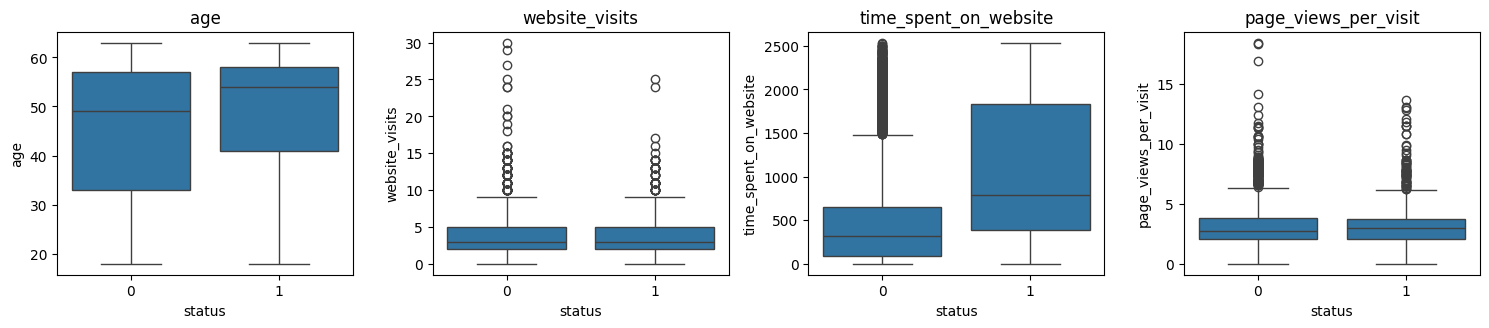

In [13]:
# Check if the outliers are spread across both status or not
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("status")


plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x="status", y=data[variable], data=data, whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
# Separating features and the target column
X = data.drop(["status"], axis = 1)
y = data["status"]

In [ ]:
# Creating dummy variables
X = pd.get_dummies(X, drop_first = True)

In [ ]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)

### EDA - Post Manipulation Check

In [ ]:
# Checking the shape of the train and test data
print("Shape of the training set: ", X_train.shape)

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)
Percentage of classes in the training set:
0    0.704151
1    0.295849
Name: status, dtype: float64
Percentage of classes in the test set:
0    0.695087
1    0.304913
Name: status, dtype: float64


<a name="7"></a>
## 7. Decision Tree Model


-  The first model perfomed really well on training data but the performance degraded for test data which means the model is overfitting on train data so we will use GridSearch for hyperparameter turning.
  - Training data Confusion Matrix shows 1 for all scores
  - Test data confusion matrix **f1-score for weighted average is 0.81**.
- For tuning, I used class_weight hyperparameter with value of {0: 0.3, 1: 0.7} to **designate more importance to class 1**.
- The tuned model performance on training data is lower than original model but we see a higher performance for test set which makes the model overall better for generalization.
   - Training data confusion matrix **f1-score for weighted average is 0.81**
   - Test data confusion matrix **f1-score for weighted average is 0.80**.
- Tree Visualization shows:
  - The **most important factor** in conversion is if **first interaction** was from **website**.
  - Among those leads that had their first interaction in website, those that **spends about 7 minutes or more** on website have more chance of conversion. The likelihood increases more if they are **older than 25**.
  - Those leads that did not have their first interaction in website can still convert if they **spend about 7 minutes or more** in the website and also **their last activity is through website**.
  -


In [ ]:
# Function to print the classification report and get confusion matrix in a proper format
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state = 7)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [ ]:
y_train.mean()

0.2958488228004957

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



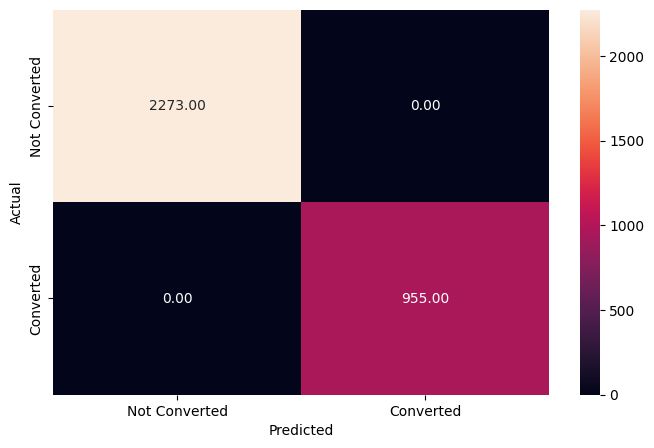

In [ ]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



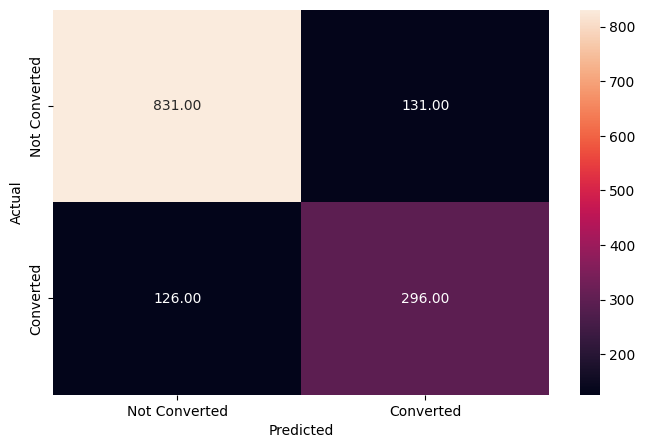

In [ ]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

In [ ]:
# Hyperparameter Tuning
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }
       0
# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



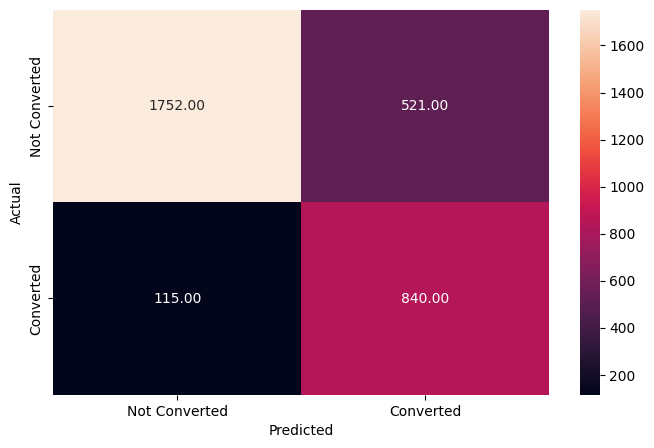

In [ ]:
# Checking performance of tuned model on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



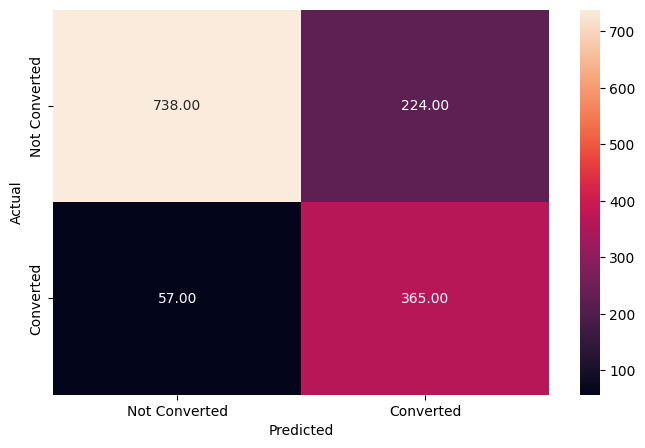

In [ ]:
# Checking performance of tuned model on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

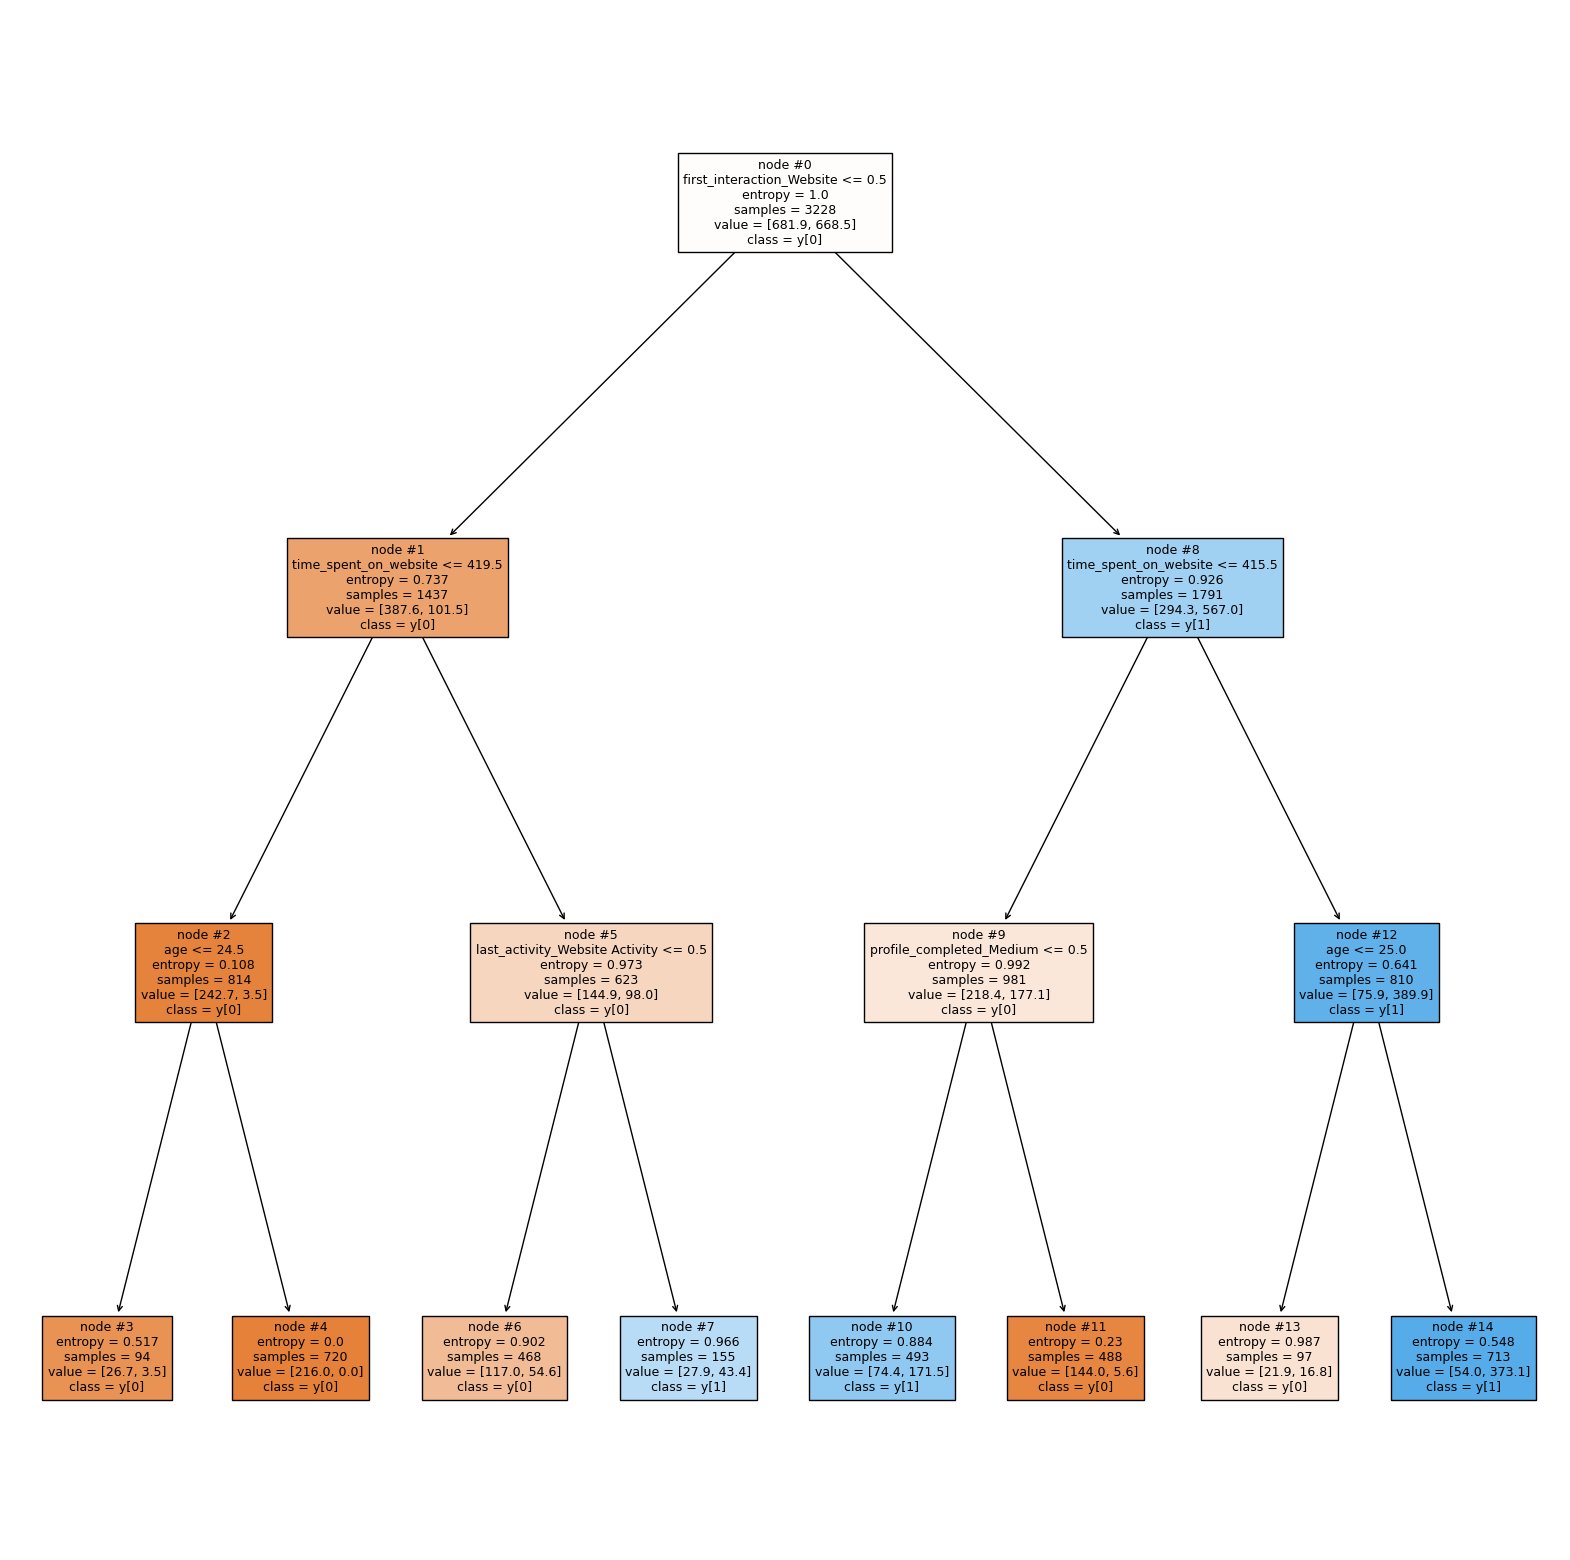

In [ ]:
# Visualize the tree
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

### Do we need to prune the tree?

- All of the nodes in above trees are using most important features to predict conversion (Time Spent on Website, First Interaction Website, Medium Profile Completion, Age, and Last_Activity_Website) which implies all nodes are adding predicting power to our decision tree.

- From visual inspection, Node 3 & Node 4 are all categorizing outcome as 0 which is same as Node 2. This means that we do not need to split node 2 and can remove node 3 & 4.





In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.348142
first_interaction_Website       0.327181
profile_completed_Medium        0.239274
age                             0.063893
last_activity_Website Activity  0.021511
website_visits                  0.000000
page_views_per_visit            0.000000
current_occupation_Student      0.000000
current_occupation_Unemployed   0.000000
profile_completed_Low           0.000000
last_activity_Phone Activity    0.000000
print_media_type1_Yes           0.000000
print_media_type2_Yes           0.000000
digital_media_Yes               0.000000
educational_channels_Yes        0.000000
referral_Yes                    0.000000


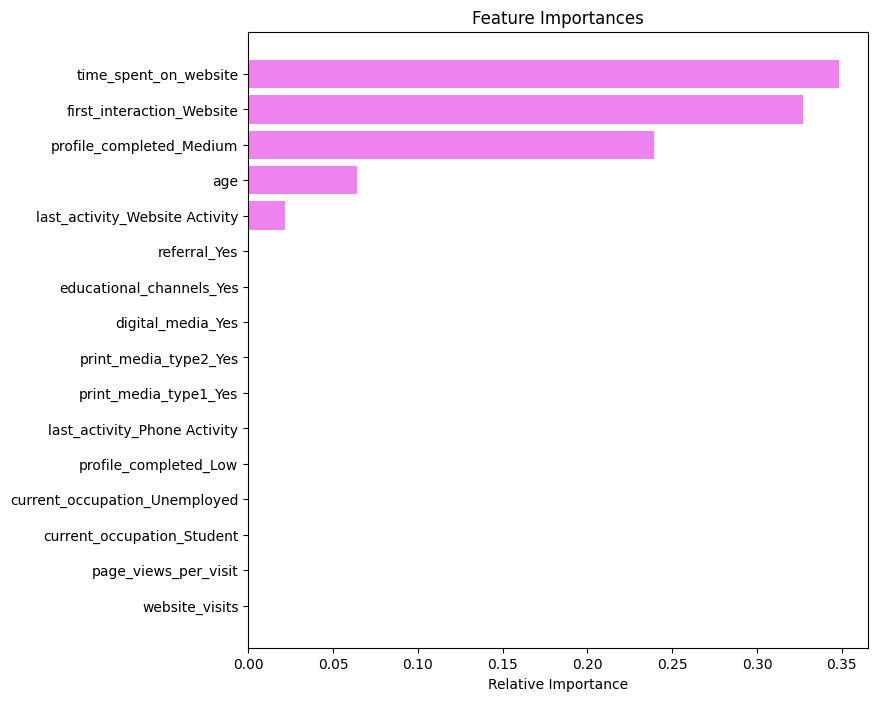

In [ ]:
 # Importance of features in the tree building
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

<a name="8"></a>
## 8. Random Forest Model

- The first model perfomed really well on training data but the performance degraded for test data which means the model is overfitting on test data so we will use GridSearch for hyperparameter turning.
  - Training data Confusion Matrix shows 1 for all scores
  - Test data confusion matrix **f1-score for weighted average is 0.86**.
- The tuned model performance on training data is lower than original model but we see a higher performance for test set which makes the model overall better for generalization.
  - Training data confusion matrix **f1-score for weighted average is 0.84**.
  - Test data confusion matrix **f1-score for weighted average is 0.84**.


In [ ]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



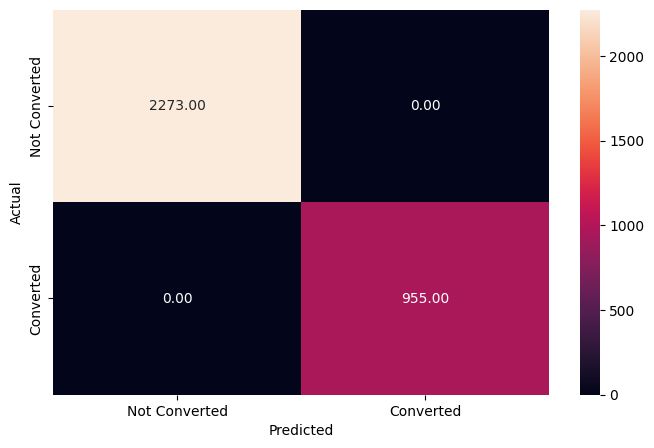

In [ ]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.81      0.70      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.83      1384
weighted avg       0.86      0.86      0.86      1384



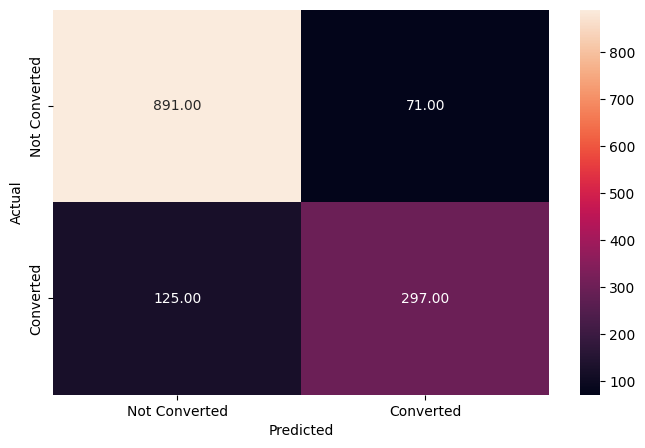

In [ ]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

In [ ]:
# Hyperparameter Tuning
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight" : ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



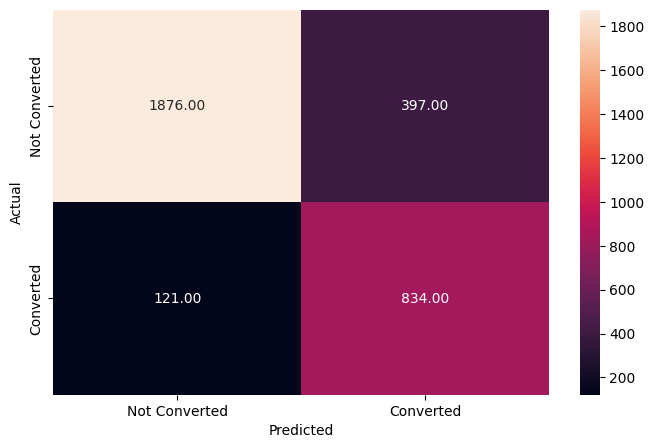

In [ ]:
# Checking performance of tuned model on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



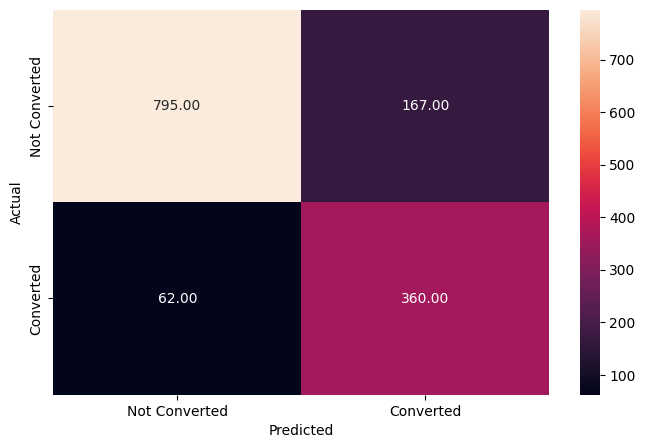

In [ ]:
# Checking performance tuned model on the test data
y_pred_test4 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test4)

### Do we need to prune the tree?

- Pruning, which involves removing certain branches or subtrees from decision trees, is often used to prevent overfitting in individual decision trees. However, Random Forests are designed to mitigate overfitting by aggregating the predictions of multiple trees. As a result, traditional pruning methods like those used for single decision trees might not be directly applicable to Random Forests.

- Random Forest algorithm gives importance to same four features as decision tree (Time Spent on Website, First Interaction Website, Medium Profile Completion and Age) but also gives importance to some other variables such as last activity type and current occupation. Considering very similar performance on random forest vs decision tree, in this scenario, more complexity might not worth the. added complexity.  

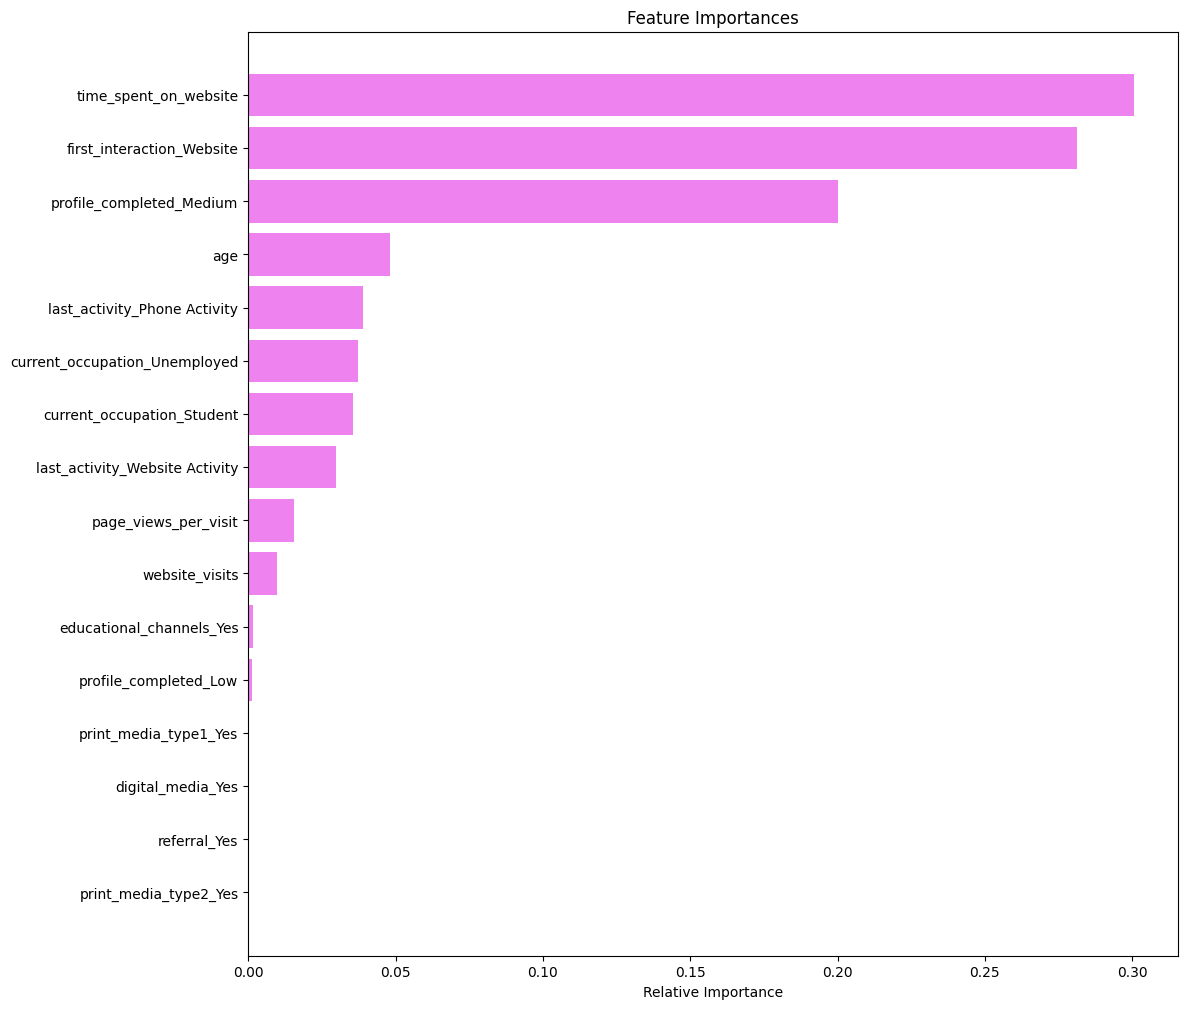

In [ ]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

<a name="9"></a>
## 9. Actionable Insights and Recommendations

**Extraalearn can focus on leads with below profile to increase conversion:**
- Those that interacted with website in their first interaction.
- Those that spent approximately 7 minutes or more on the website.
- Those with current occupation at professionals or are currently unemployed.


**Potential area of opportunities that require more investigation:**
- Our analysis showed that Extraalearn Website is an effective way to engage leads. It is equally important for Extraalearn to understand how to improve performance of Mobile App which can potentially improve conversion of younger users and students.
- We also saw that when a lead is referred by an existing customer, there's a high chance of a conversion. The company should try to get more leads through referrals by promoting rewards for the existing customer base when they refer someone.
- The current marketing channels Extraalearn uses is not showing significant importance in leads conversation, We recommend the company to reevaluate the budget for these programs and try other methodologies for advertising.
